<a href="https://colab.research.google.com/github/soyoonjeong/deeplearning_from_scratch/blob/main/ch3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용 (퍼셉트론에서는 활성화 함수로 갑자기 변화하는 계단 함수 이용)
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있음
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있음 

In [ ]:
import numpy as np
import matplotlib.pylab as plt

# 활성화 함수 

## 계단 함수 

In [ ]:
# 인수가 실수인 것만 받아들이는 계단 함수 
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
# 넘파이 배열도 지원하는 계단 함수
def step_function(x):
  y = x > 0
  return y.astype(np.int)

<ipython-input-8-d6be9a268e09>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


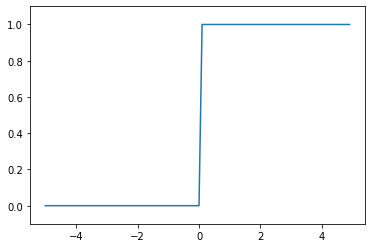

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수 

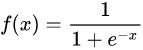

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x)) # 넘파이 배열 지원 : 브로드캐스트 기능 

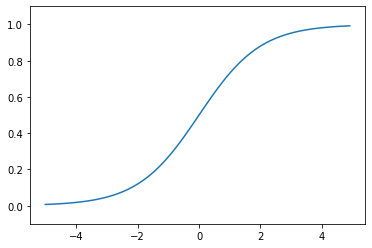

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 계단 함수와 시그모이드 함수의 비교 

차이점
- **매끄러움**의 차이 <br>
시그모이드 함수 : 입력에 따라 출력이 연속적으로 변화<br>
계단 함수 : 0을 경계로 출력이 급격하게 변화 

공통점 
- 입력이 작을 때 출력이 0에 가깝고, 입력이 클 때 출력이 1에 가까움
- 출력이 0과 1 사이 

## 비선형 함수 

**신경망에서는 활성화 함수로 비선형 함수를 사용해야함**
- 선형 함수 : 출력이 입력의 상수배만큼 변하는 함수 
- 선형 함수는 은닉층이 없는 네트워크로도 표현할 수 있기에 층을 깊게 하는 의미가 없음 

## ReLU 함수 

입력이 0을 넘으면 그 입력 그대로 출력, 0 이하이면 0을 출력하는 함수 

In [ ]:
def relu(x):
  return np.maximum(0, x)

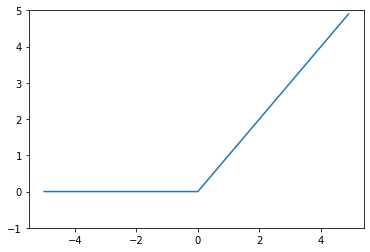

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.0)
plt.show()

# 3층 신경망 구현하기 
입력부터 출력까지의 처리(순방향 처리) 구현 

### 입력층 -> 1층 

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 1층 -> 2층 

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### 2층 -> 출력층

In [ ]:
def identify_function(x): # 출력층의 활성화 함수로 항등 함수 
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3) 

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함
- 회귀 : 항등 함수
- 2클래스 분류 : 시그모이드 함수 
- 다중 클래스 분류 : 소프트맥스 함수 

### 구현 정리 

In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identify_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 출력층 설계하기 

어떤 문제냐에 따라 출력층에 사용하는 활성화 함수 다름 
- 회귀 : 항등 함수 
- 분류 : 소프트맥스 함수 

## 소프트맥스 함수 

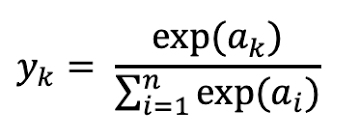

- 분자 : 각 입력 신호의 지수 함수 
- 분모 : 모든 입력 신호의 지수 함수의 합 => 출력층의 각 뉴런은 모든 입력 신호에서 영향을 받음 

In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 소프트맥스 함수 구현 시 유의점 

PROBLEM : 오버플로 문제 
- 지수 함수의 값은 매우 커서 큰 값끼리 나눗셈을 할 경우 수치가 불안정해짐 

SOLUTION : 입력 신호에 어떤 값(보통 입력 신호 중 최댓값)을 빼서 값을 낮춤 
- 입력 신호에 어떤 값을 빼도 결과는 바뀌지 않기 때문<br>
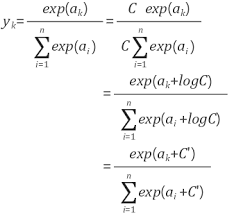

In [ ]:
def softmax(a):
  exp_a = np.exp(a- np.max(a)) # 최댓값 빼서 입력 낮춰줌 
  sum_exp_a = sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 소프트맥스 함수의 특징 

- 출력이 0과 1 사이 실수
- 소프트맥스 함수 출력의 총합은 1 <br>
=> 소프트맥스 함수 출력을 **확률** 로 해석 가능 
- 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식 <br>
=> 신경망으로 분류할 때 출력층의 소프트맥스 함수를 생략해도 됨

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


# 손글씨 숫자 인식 

In [ ]:
import sys, os
from mnist import load_mnist
from PIL import Image
import pickle

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)
img = x_train[0]
label = t_train[0]
img = img.reshape(28, 28)
img_show(img)

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False) 
    # 정규화 : 0~255 범위인 각 픽셀의 값을 0~1 범위로 변환 
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("정확도 : ", float(accuracy_cnt) / len(x))

정확도 :  0.9352


### 배치 처리 

- 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 최적화
- 배치 처리를 함으로써 버스에 주는 부하를 줄일 수 있음 

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("정확도 : ", float(accuracy_cnt) / len(x))

정확도 :  0.9207
